In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies.
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('../../dataset/per_capita_MAIN_ds.csv')

In [3]:
df_ml = df[df['Year'] <= 2018]

In [4]:
# dropped null values (kosovo - ghg, taiwan - clean water, ghg, population)
df_ml.dropna(inplace=True)

D:\Programming\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
df_ml.head()

,Country,Year,Life Ladder,Temperature,Clean Water,PM2.5,pc Greenhouse Gas Emissions,pc CO2 Emissions
0,Afghanistan,2010,4.758,14.629,48.28708,52.49585,0.001539,0.287738
1,Afghanistan,2011,3.832,16.487,50.82785,57.09972,0.001947,0.401953
2,Afghanistan,2012,3.783,14.373,53.40352,55.46611,0.002142,0.327922
3,Afghanistan,2013,3.572,16.156,56.01404,59.62277,0.002318,0.261570
4,Afghanistan,2014,3.131,15.647,58.65937,62.72192,0.002536,0.232968


In [6]:
X = df_ml.drop(columns=['Life Ladder', 'Country', 'Year'])

In [7]:
y = df_ml['Life Ladder']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
# Create scaler instance and fit training data.
X_scaler = StandardScaler().fit(X_train)
# Scale the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# View standardization.
X_train_scaled

array([[ 0.44813363, -0.11386396,  2.02303604, -0.95403057, -0.85296376],
       [-0.66232441, -0.20099565, -0.56309679, -0.53303537, -0.6683169 ],
       [-1.36920263, -0.1121788 , -0.16720847, -0.77716472, -0.69483754],
       ...,
       [ 0.9297969 ,  0.19250893, -0.35608499, -0.62832014, -0.61114737],
       [ 0.82059163, -2.40630147, -0.02371553, -0.99823295, -0.9649445 ],
       [-0.68530326,  0.40761301,  0.28825674,  0.12010811,  0.25058597]])

In [11]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [12]:
coefficient = pd.DataFrame({'Coefficient': model.coef_}, index=X.columns)
coefficient

,Coefficient
Temperature,0.019317
Clean Water,0.377466
PM2.5,-0.316901
pc Greenhouse Gas Emissions,0.303299
pc CO2 Emissions,0.044429


In [13]:
# Make predictions.
pred = model.predict(X_test_scaled)

In [14]:
# Compare the results.
results = pd.DataFrame(zip(pred, y_test), columns=['Predicted', 'Actual'])
results['Difference'] = abs(results['Predicted'] - results['Actual'])
results

,Predicted,Actual,Difference
0,7.349245,7.177,0.172245
1,5.265112,5.743,0.477888
2,6.329337,6.904,0.574663
3,5.461938,4.983,0.478938
4,6.020473,5.711,0.309473
...,...,...,...
216,5.527169,5.792,0.264831
217,6.977460,7.026,0.048540
218,5.826734,4.770,1.056734
219,6.143229,5.975,0.168229


In [15]:
model.score(X_test_scaled, pred)

1.0

In [16]:
# Style.
from matplotlib import style
style.use('fivethirtyeight')

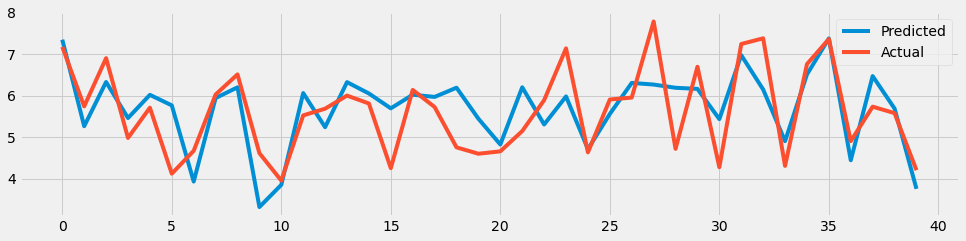

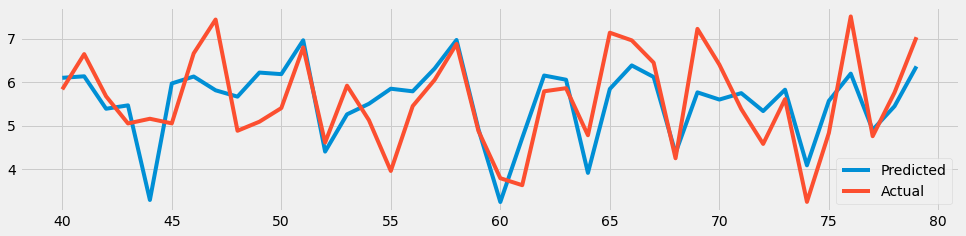

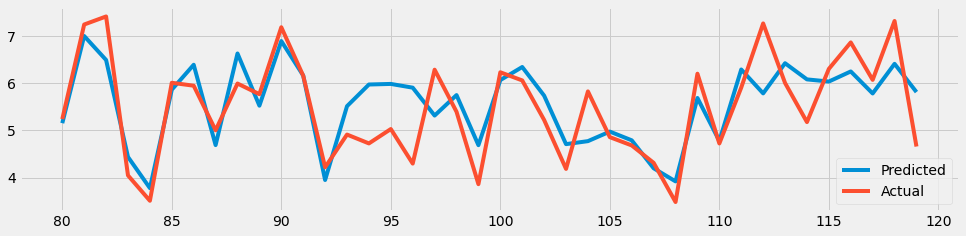

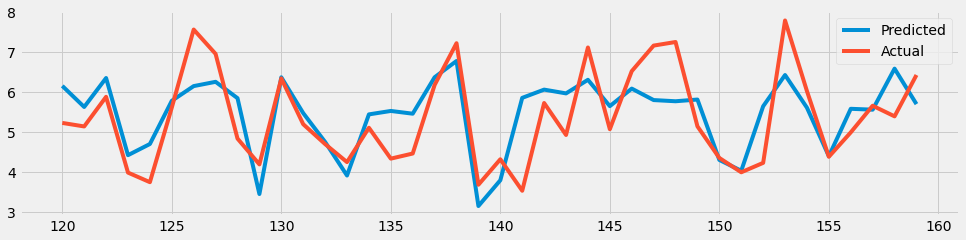

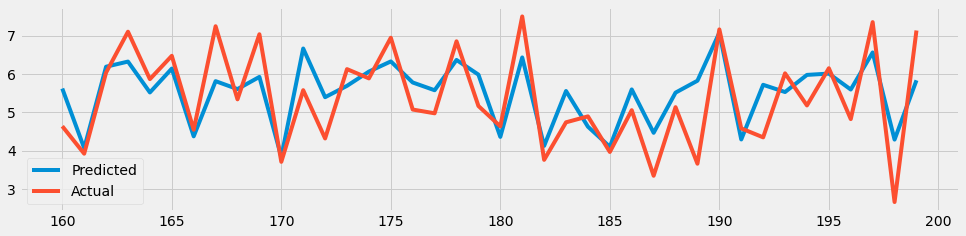

In [17]:
# Try and plot the differences.
bins = [0, 40, 80, 120, 160]
for i in bins:
    results.iloc[i:i+40].plot(y=['Predicted', 'Actual'], figsize=(15,3.5))